**Section 7: Support Vector Machines**

Notebook for "Introduction to Data Science and Machine Learning"

version 1.0, June 14 2024


# 1. Preparations

You find several `.csv` files  on moodle. Please download them and save them in the `data` subfolder.

In order to use the relevant packages we need the following import statements: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.svm import SVC

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import modules.SVCPlots as sp

In [ ]:
help(sp.plotSimpleScatter)

In [ ]:
help(sp.plotScatterWithLinearHyperplane)

# 2. Example 1: Linearly Separable Data

At first we take a look at the data in `data10.csv`. We load the data frame using a function of `pandas`: 

In [ ]:
df=pd.read_csv('data/data10.csv')

**Info:** The data was created using the function `make_classification()` in the `sklearn.datasets` module.

Let's look at the data:

In [ ]:
print(df.head())
print(df.info())

We call the function `plotSimpleScatter()` to create and store a simple scatter plot.

In [ ]:
sp.plotSimpleScatter(df,'data10')

We want to define a **Support Vector Classifier** to classify the two classes.

As the data is linearly separable, we can use a linear classifier. The classifier is of the class `SVC`. You find the documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

First we create the classifier:

In [ ]:
clf=SVC(kernel="linear")

The classifier required the $X$ as well as the $y$ data. We will thus create a data frame for the $X$ data and a series for the labels ($y$) data. 

By the way: can you explain, why $X$ is normally written with a capital letter while a lowercase letter is used for $y$?

In [ ]:
Xdata=df.copy()
ydata=Xdata.pop('class') 

Now we can call the classifier to fit the data:

In [ ]:
clf.fit(Xdata,ydata)

An output the accuracy, which will be 100% for the simple classifier: 

In [ ]:
print("accuracy:",clf.score(Xdata,ydata))

Now we want to take a look at the hyperplane, the Support Vector Classifier.

The classifier `clf` contains the relevant variables, the intercept as well as the coefficients, the weights:

In [ ]:
print('The coefficients:',clf.coef_)
print('The intercept:',clf.intercept_)

The coefficients are the two weights $w_0$ and $w_1$Please note the following:

The SVC algorithms solves the following equation:

$$w_0 x+ w_1 y + w_{inter} = 0$$

The hyperplane is a line with the following equation:
$$f(x) = y= ax+b$$

We must therefore make the following transformation: 

$$y=\frac{-w_0x-w_{inter}}{w_1}$$

therefore, we can set $a=-w_0 / w_1$ and $b=-w_{inter} / w_1$:

In [ ]:
w0,w1=clf.coef_[0]
w_inter=clf.intercept_
a=-w0/w1
b=-w_inter/w1

We determine the minimum and maximum $X$ values for feature 1 and 2. We add a 1 to create some space between plotted observances and the border of the plot:

In [ ]:
cols=df.columns
xmin=df[cols[0]].min()-1
xmax=df[cols[0]].max()+1
ymin=df[cols[1]].min()-1
ymax=df[cols[1]].max()+1

Now we can specify $x$ values and use the determines values $a$ and $b$ of the hyperplane to calculate the corresponding $y$ values:

In [ ]:
xValues=np.linspace(xmin,xmax,20)
yValues=xValues*a+b

And add the hyperplane (in gray) to the scatter plot.

In [ ]:
fig=plt.figure()   
    
sns.scatterplot(data=df, x=cols[0], y=cols[1],hue=cols[2])
plt.plot(xValues,yValues,'gray')
plt.ylim((ymin,ymax)) # we limit the y axis to the range where observations exist
                      # just try out the effect when you ommitt this line
plt.title("The scatter Plot with classifier: data10")
fig.savefig('plots/data10WithSVC.png',dpi=600)

We call now the function to plot the hyperplane, margins and support vectors: 

And we call the function:

In [ ]:
sp.plotScatterWithLinearHyperplane(df,clf,'data10')

When you open the graph on the drive, you can zoom in and take a closer look.

We can equally graphically display the decision boundaries. This is especially useful to visualize the SVC if the data is not linearily separable (Hint: if the class `DecistionBoundaryDisplay` does not exist, you need to update to the latest version of `sklearn` (see at the top of the notebook)):

In [ ]:
fig=plt.figure()
                                           
DecisionBoundaryDisplay.from_estimator(clf,X=Xdata,response_method="predict",cmap=plt.cm.coolwarm,
                                           alpha=0.6)
plt.scatter(Xdata['feature1'],Xdata['feature2'],c=ydata,cmap=plt.cm.coolwarm,edgecolors='k')
plt.title('SVM DecisionBoundary: data10')
plt.savefig('plots/DecisionBoundary_data10.png',dpi=600)


**Exercise:**

Read the data from the files `data14.csv`and `data23.csv2` create similar plots using the specified function. 

In [ ]:
# your code data14.csv



In [ ]:
# your code data23.csv


# 3. Example 1: Splitting the data into a training and a test set

Of course the results above are very optimistic, as the classifier is not tested with unseen data. Therefore, we split the data into a trainings and a test data set. First we read the data again:

In [ ]:
# read the data
df=pd.read_csv('data/data10.csv')
# separate data from labels
Xdata=df.copy()
ydata=Xdata.pop('class')

And split the data into a trainings and test set:

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(Xdata,ydata,test_size=0.33,random_state=10)

Can you explain, why the parameter `random_state` is used?

We now create the classifier and train it using the training data:

In [ ]:
clf=SVC(kernel="linear", random_state=10)
clf.fit(X_train,y_train)

We now print two scores (accuracy values), one for the training data and one for the test data:

In [ ]:
print("accuracy trainnings data:",clf.score(X_train,y_train))
print("accuracy test data:      ",clf.score(X_test,y_test))

And we see a perfect score for both, training and testing.

Now let's take a look at a different data set, the `data14.csv` file.

In [ ]:
df=pd.read_csv('data/data14.csv')
# separate data from labels
Xdata=df.copy()
ydata=Xdata.pop('class')

X_train, X_test, y_train, y_test=train_test_split(Xdata,ydata,test_size=0.33,random_state=10)
clf=SVC(kernel="linear", random_state=10)
clf.fit(X_train,y_train)

print("accuracy trainings data:",clf.score(X_train,y_train))
print("accuracy test data:      ",clf.score(X_test,y_test))

Now we have a lower accuracy. Let's take a look at the confusion matrix:

In [ ]:
# we need to determine the predicted labels
yPredict=clf.predict(X_test)
# and calculate the confusion matrix
cm=confusion_matrix(y_test, yPredict)
# and print it
print(cm)

The module `sklearn.metrics` offers a nice Class to display the confusion matrix: 

In [ ]:
fig=plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title('CM Test: data14')
plt.savefig('plots/confusionMatrix_Test_data14.png',dpi=600)


If you take a close look, you can see the four misclassified sampled (one orange is behind one of the blue support vectors):

In [ ]:
sp.plotScatterWithLinearHyperplane(df,clf,"data14_test")

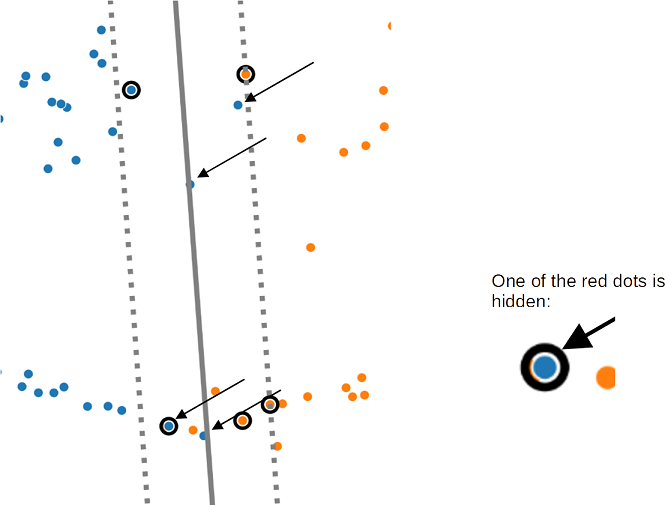

Now we draw the decision boundary. In order to distinguish between trainings and test samples, I used the `alpha` parameter that regulates the transparency and plotted traings data with a higher transparency than the testing data:

In [ ]:
fig=plt.figure()
                                       
DecisionBoundaryDisplay.from_estimator(clf,X=Xdata,response_method="predict",cmap=plt.cm.coolwarm,
                                        alpha=0.4)
plt.scatter(X_train['feature1'],X_train['feature2'],c=y_train,
            cmap=plt.cm.coolwarm,edgecolors='k',alpha=0.5)
plt.scatter(X_test['feature1'],X_test['feature2'],c=y_test,
            cmap=plt.cm.coolwarm,edgecolors='k',alpha=1)
plt.title('TT SVM DecisionBoundary: data14')
plt.savefig('plots/DecisionBoundary_data14.png',dpi=600)

# 4. Non linearly separable data

SVMs are equally suitable to classify data, that is not linearly separable. Therefore it does not make sense to draw a linear hyperplane.

As one example we use a dataset in the file `dataMoon23.csv` that was generated using the function  `make_moons()` in `sklearn.datasets`.

In [ ]:
# your code
df=pd.read_csv('data/dataMoon23.csv')
sp.plotSimpleScatter(df,'dataMoon23')

2. Separate the `class` column and store it as `ydata`.

In [ ]:
# your code

Xdata=df.copy()
ydata=Xdata.pop('class')

3. Split the data in test and trainings data set. Use `random_state=10` and a `test_size` of 0.33.

In [ ]:
# your code

X_train, X_test, y_train, y_test=train_test_split(Xdata,ydata,test_size=0.33,random_state=10)


4. Create an SVC Classifier. As the data is not linearly separable we use the standard kernel. Set `random_state` to 10.   

In [ ]:
# your code

clf=SVC(random_state=10)

5. Train the SVC with the training data and output the score for training and test data.

In [ ]:
# your code

clf.fit(X_train,y_train)

print("accuracy trainings data:",clf.score(X_train,y_train))
print("accuracy test data:      ",clf.score(X_test,y_test))

6. Calculate the confusion matrix and plot it.

In [ ]:
# your code

# we need to determine the predicted labels
yPredict=clf.predict(X_test)
# and calculate the confusion matrix
cm=confusion_matrix(y_test, yPredict)
# and print it
print(cm)

7. Plot the decision boundaries.

In [ ]:
# your code
fig=plt.figure()
                                       
DecisionBoundaryDisplay.from_estimator(clf,X=Xdata,response_method="predict",cmap=plt.cm.coolwarm,
                                        alpha=0.4)
plt.scatter(X_train['feature1'],X_train['feature2'],c=y_train,
            cmap=plt.cm.coolwarm,edgecolors='k',alpha=0.5)
plt.scatter(X_test['feature1'],X_test['feature2'],c=y_test,
            cmap=plt.cm.coolwarm,edgecolors='k',alpha=1)
plt.title('TT SVM DecisionBoundary: dataMoon23')
plt.savefig('plots/DecisionBoundary_dataMoon23.png',dpi=600)

# 5. Hyperparameters: C

Please load the data set `dataCircle37.csv` and perform the same steps as above:
1. Load the data set and make a simple scatter plot.
2. Separate the `class` column and store it as `ydata`.
3. Split the date in test and trainings data set. Use `random_state=10` and a `test_size` of 0.33.
4. Create an SVC Classifier. As the data is not linearly separable we use the standard kernel. Set `random_state` to 10.
5. Train the SVC with the training data and output the score for training and test data.
6. Calculate the confusion matrix and plot it.
7. Plot the decision boundaries.


In [ ]:
# your code



The accuracy most probably looks bad! In the lecture we discussed the parameter `C`. Do you remember what it stands for?

Test different values for the parameter `C` and display the accuracy for teh trainigs and test data. To do so pass a value for the optional paramater `C`: `clf=SVC(random_state=10,C=valueForC)`

In [ ]:
# your code

    

Select a value for `C` that achieves higher accuracy and plot the confusion matrix as well as the decision boundary for this value.

In [ ]:
# your code


# 6. Multiple Hyperparameters: C and gamma

Often we have the possibility to modify different paramaters. Those can be modified independently of each other. Having three hyperparameters with 3 values each gives 9 different possibile combiniation. 

Therefore we equally train hyperparameters and use a validation test set to evaluate the hyperparameters.  A specific test set, that was not used for the training of hyperparameters is then used to evaluate the final classifier.

In this example we test different combinations of the parameter `C` and `gamma`. As we use the training to determine a good combination of hyperparameters, we name the validateion set `val` (for validation).

The code in this example was highly inspired by Chi Nhan Nguyen, Oliver Zeigermann, Machine Learning kurz & gut, O-Reilly, 2018.

1. We load and prepare the data:

In [ ]:
df=pd.read_csv('data/dataCircle37.csv')
Xdata=df.copy()
ydata=Xdata.pop('class')
# we first separate the test data set
# we remove 20 % of the data for test and the validation set 
X_train, X_test, y_train, y_test=train_test_split(Xdata,ydata,test_size=0.33,random_state=10)   
# and now we separate the validation data set
X_trainH, X_val, y_trainH, y_val=train_test_split(X_train,y_train,test_size=0.33,random_state=11)   

2. We create a list of potential `gamma` values.

In [ ]:
gammaValues=np.logspace(-3,2,200)

3. We determine the training and test accuracy for all SVC with the different `gamma` values and store the results in lists: 

In [ ]:
train_scores, val_scores=[],[]
# we will keep track of the max accucary and its gamma value
gammaMaxAccuracy=0
maxValAccuracy=0
for g in gammaValues:
    # learn an SVC
    # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    clf=SVC(gamma=g,random_state=10)
    clf.fit(X_trainH,y_trainH)
    train_scores.append(clf.score(X_trainH,y_trainH))
    val_scores.append(clf.score(X_val,y_val))
    if clf.score(X_val,y_val)>maxValAccuracy:
        maxValAccuracy=clf.score(X_val,y_val)
        gammaMaxAccuracy=g
            

4. We plot the result.

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(gammaValues,train_scores,'b',label='training data')
plt.plot(gammaValues,val_scores,':m', label='validation data')
plt.legend()
ax.set_xscale('log')
plt.xlabel('gamma Value')
plt.ylabel('accuracy')
plt.axis('tight')
plt.title("Gamma Values for dataCircle37")
plt.savefig('plots/GammaTest_dataCircle37.png', dpi=600)
        

And print the maximum validation accuracy and its gamma value

In [ ]:
print(f"max validation accuracy: {maxValAccuracy:.5f} for gamma {gammaMaxAccuracy}")

We can observe that when increasing `gamma` we achieve a maximum in the validation (minimum variance). While we can reduce the bias (increase the traing accuracy) when further increasing `gamma` the variance will be reduced.

To enable the reuse of above code we generate a function:

In [ ]:
def gammaTest(file,cValue):
    gammaValues=np.logspace(-3,2,200)
    df=pd.read_csv('data/'+file)
    Xdata=df.copy()
    ydata=Xdata.pop('class')
   
    # we first separate the test data set
    X_train, X_test, y_train, y_test=train_test_split(Xdata,ydata,test_size=0.33,random_state=10)   
    # and now we separate the validation data set
    X_trainH, X_val, y_trainH, y_val=train_test_split(X_train,y_train,test_size=0.33,random_state=11)   
    
    # we will keep track of the max accucary and its gamma value
    gammaMaxAccuracy=0
    maxValAccuracy=0
    train_scores, val_scores=[],[]
    for g in gammaValues:
        # learn an SVC
        # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
        clf=SVC(gamma=g,random_state=10,C=cValue)
        clf.fit(X_trainH,y_trainH)
        train_scores.append(clf.score(X_trainH,y_trainH))
        val_scores.append(clf.score(X_val,y_val))
        if clf.score(X_val,y_val)>maxValAccuracy:
            maxValAccuracy=clf.score(X_val,y_val)
            gammaMaxAccuracy=g
            
            
            
    fig=plt.figure()
    ax=fig.add_subplot(111)
    plt.plot(gammaValues,train_scores,'b',label='training data')
    plt.plot(gammaValues,val_scores,':m', label='validation data')
    plt.legend()
    ax.set_xscale('log')
    plt.xlabel('gamma Value')
    plt.ylabel('accuracy')
    plt.axis('tight')
    plt.title(f"Gamma Values for {file[:-4]} with C={cValue}")
    plt.savefig(f'plots/C_{cValue}_GammaTest_{file[:-4]}.png', dpi=600)
    return maxValAccuracy, gammaMaxAccuracy

To generate a plot for above file and `C=1`:

In [ ]:
gammaTest('dataCircle37.csv',cValue=1)

Use the function to plot similar `gamma` plots for all possible `C` values from 1 to 10. Compare the results. 

In [ ]:
# we create a dictionayry to store the gamma and accuracy value for each C value
gammaTestValues={}
for c in range(1,11):
    a,g=gammaTest('dataCircle37.csv',cValue=c)
    gammaTestValues[c]={'accuracy':a,'gamma':g}

And we display the values for the different `C`-values:

In [ ]:
for s,w in gammaTestValues.items():
    print(f"C={s:2}: acc={w['accuracy']:.4f}, gamma={w['gamma']:8.5f}")

As we can clearly observe, the optimum `gamma` depends on the specifc `C` value.

We now select a combination of `C` and `gamma` with a maximum accuracy and train the SVC with the complete trainings data (trainH and validation data) and test it with the formerly unseen test data: 

In [ ]:
clf=SVC(random_state=10,C=4, gamma=0.61510)
clf.fit(X_train,y_train)

print("accuracy trainings data:",clf.score(X_train,y_train))
print("accuracy test data:      ",clf.score(X_test,y_test))
# we need to determine the predicted labels
yPredict=clf.predict(X_test)
# and calculate the confusion matrix
cm=confusion_matrix(y_test, yPredict)
# and print it
print(cm)

fig=plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.title('CM Test: dataCircle37 C=4 gamma=0.61510,')
plt.savefig('plots/confusionMatrix_Test_dataCircle37_C3_gamma.png',dpi=600)

fig=plt.figure()
                                       
DecisionBoundaryDisplay.from_estimator(clf,X=Xdata,response_method="predict",cmap=plt.cm.coolwarm,
                                        alpha=0.4)
plt.scatter(X_train['feature1'],X_train['feature2'],c=y_train,
            cmap=plt.cm.coolwarm,edgecolors='k',alpha=0.5)
plt.scatter(X_test['feature1'],X_test['feature2'],c=y_test,
            cmap=plt.cm.coolwarm,edgecolors='k',alpha=1)
plt.title('TT SVM DecisionBoundary, C=4 gamma=0.61510, dataCircle37')
plt.savefig('plots\DecisionBoundary_dataCircle37_C3_gamma.png',dpi=600)



**Exercise:**

Open the data set in the file `dataCircle25.csv` and make a simple scatter plot.

In [ ]:
# your code



We create the trainings and test data set. Out of the trainings data set create additionally a trainings data set for the hyperparameter as well as a validation data set.

In [ ]:
# we first separate the test data set
# we remove 20 % of the data for test and the validation set 
X_train, X_test, y_train, y_test=train_test_split(Xdata,ydata,test_size=0.33,random_state=10)   
# and now we separate the validation data set
X_trainH, X_val, y_trainH, y_val=train_test_split(X_train,y_train,test_size=0.33,random_state=11)   

Repeat the gamma tests for `C` from 1 to 10, observe the results. 

In [ ]:
# your code


Print the results for the best combination of `C` and `gamma` values:

In [ ]:
# your code


Select a good combination for the `C` and `gamma` value, train the data on the whole trainings data set and test ist on the test set.

In [ ]:
# your code


*End of the Notebook*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This notebook was created by Christina B. Class for teaching at EAH Jena and is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.